# 

# Perkenalan

#Pada final project kesatu ini, peserta diharuskan membuat sebuah model untuk memprediksi harga taksi di negara amerika serikat. data yang digunakan berasal dari kaggle yang berjumlah 57 atribut, akan tetapi hanya 10 atribut yang paling relevan. hasil akhir dari program ini yaitu mampu membuat sebuah model yang dapat memprediksi harga dari sebuah taksi dengan berdasarkan kepada atribut yang ada.

# Melakukan Import Package

In [1]:
#melakukan import package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Loading

In [2]:
data_set = pd.read_csv("../Dataset/rideshare_kaggle.csv")

In [3]:
data_set.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
data_set.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
#mengetahui central tendency dari data
data_set.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [6]:
#mengetahui type data dari data yang dipakai
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Data Cleaning

In [7]:
df = data_set

In [8]:
#Label Encod
le = preprocessing.LabelEncoder()

In [9]:
df["source"] = le.fit_transform(data_set["source"])
df["destination"] = le.fit_transform(data_set["destination"])
df["cab_type"] = le.fit_transform(data_set["cab_type"])
df["long_summary"] = le.fit_transform(data_set["long_summary"])
df["short_summary"] = le.fit_transform(data_set["short_summary"])

In [10]:
#Mencari Corelasi Setiap variabel
df_cor = df.corr().abs()
print(df_cor)

                             timestamp      hour       day     month  \
timestamp                     1.000000  0.028004  0.341292  0.771182   
hour                          0.028004  1.000000  0.066090  0.079379   
day                           0.341292  0.066090  1.000000  0.861306   
month                         0.771182  0.079379  0.861306  1.000000   
source                        0.000531  0.002685  0.000760  0.000174   
destination                   0.001181  0.004190  0.001813  0.000670   
cab_type                      0.000854  0.001257  0.001868  0.000776   
price                         0.000808  0.000561  0.000722  0.000913   
distance                      0.003553  0.002280  0.000627  0.002298   
surge_multiplier              0.000572  0.000077  0.001389  0.000628   
latitude                      0.168130  0.019493  0.006838  0.085791   
longitude                     0.136802  0.006295  0.078690  0.126912   
temperature                   0.248748  0.218769  0.084116  0.08

#dari 57 atribut yang ada, hanya ada 10 atribut yang paling relevan yaitu:source,destination,cab_type,distance,surge_multiplier,latitude,longitude,visibility,short_summary,moonPhase

In [11]:
#Cek missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [12]:
#Mengganti nilai missing values Price dengan nilai median
median_price = df["price"].median()
df['price'].fillna(median_price, inplace=True)

In [13]:
#mengecek kembali nilai missig value
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

# Explorasi Data

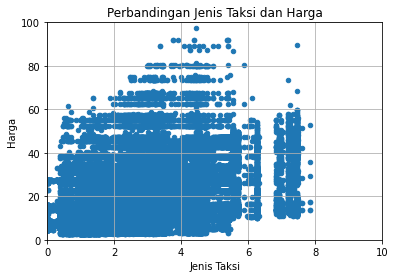

In [14]:
df.plot(kind='scatter', x='distance', y='price')
plt.title("Perbandingan Jenis Taksi dan Harga")
plt.xlabel("Jenis Taksi")
plt.ylabel("Harga")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Data Preprocessing

In [15]:
feature = ["source","destination","cab_type","distance","surge_multiplier","latitude","longitude",
          "visibility","short_summary","moonPhase"]
target = ["price"]
X = df[feature]
y = df[target]

# Pendefinisian Model

In [16]:
lm = linear_model.LinearRegression(fit_intercept=False)
model = lm.fit(X,y)

# Pelatihan Model

In [17]:
predict = model.predict(X)
print(predict)

[[12.15799141]
 [12.19086165]
 [12.13061999]
 ...
 [12.61753316]
 [12.61753316]
 [12.61753316]]


In [18]:
model.score(X,y)

0.16782526545154364

In [19]:
print('coef',model.coef_)

coef [[ 3.33906759e-02  1.04375407e-02 -1.20774451e+00  2.56307444e+00
   2.19926411e+01  2.80932955e-01  3.24893541e-01 -1.09545461e-03
   6.81476625e-03 -2.95665739e-04]]


# Evaluasi Model

ValueError: x and y must be the same size

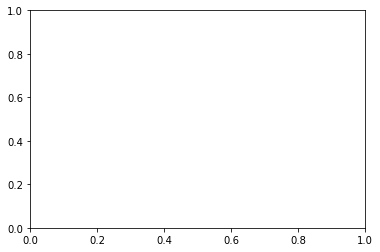

In [20]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X,predict)
plt.title('Hasil Prediksi')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Model Inference

In [21]:
model.predict(100)

ValueError: Expected 2D array, got scalar array instead:
array=100.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Kesimpulan

#Kesimpulan yang dapat diambil dari model yang dibuat yaitu akurasi model yang dibuat menunjukan angka 0.16782526545154364 atau sekitar 16%